In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-stroke-prediction/Stroke.csv


In [96]:
df= pd.read_csv("/kaggle/input/heart-stroke-prediction/Stroke.csv")

# DATA OVERVIEW

In [97]:
df.head()

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 43400 non-null  int64  
 1   Gender             43400 non-null  object 
 2   Age                43400 non-null  float64
 3   Hypertension       43400 non-null  int64  
 4   Heart_Disease      43400 non-null  int64  
 5   Ever_Married       43400 non-null  object 
 6   Work_Type          43400 non-null  object 
 7   Residence_Type     43400 non-null  object 
 8   Avg_Glucose_Level  43400 non-null  float64
 9   BMI                41938 non-null  float64
 10  Smoking_Status     30108 non-null  object 
 11  Stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


### We have missiong values for smoking status and BMI

# DATA CLEANING

### Filling the mission BMI value with its mean.

In [99]:
df['BMI'].fillna(value=df['BMI'].mean(),inplace= True)

### Using the fillna method to fill mission Smoking status values

In [100]:
df['Smoking_Status'].fillna(method='ffill',inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 43400 non-null  int64  
 1   Gender             43400 non-null  object 
 2   Age                43400 non-null  float64
 3   Hypertension       43400 non-null  int64  
 4   Heart_Disease      43400 non-null  int64  
 5   Ever_Married       43400 non-null  object 
 6   Work_Type          43400 non-null  object 
 7   Residence_Type     43400 non-null  object 
 8   Avg_Glucose_Level  43400 non-null  float64
 9   BMI                43400 non-null  float64
 10  Smoking_Status     43399 non-null  object 
 11  Stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [102]:
df.head()

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,formerly smoked,0


### We still have one missing value. Therefore, removing the row for better  and accurate results

In [103]:
df.dropna(inplace=True)

##  Dropping duplicate data if there is any.

In [104]:
df.drop_duplicates()

,ID,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,formerly smoked,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [105]:
df.isnull().sum()

ID                   0
Gender               0
Age                  0
Hypertension         0
Heart_Disease        0
Ever_Married         0
Work_Type            0
Residence_Type       0
Avg_Glucose_Level    0
BMI                  0
Smoking_Status       0
Stroke               0
dtype: int64

## Looks like we have cleaned our data.

# Time for DATA ANALYSIS through VISUALIZATION

## Importing Libraries

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

### Lets analyse the count of different Genders

Text(0.5, 1.0, 'Gender Count')

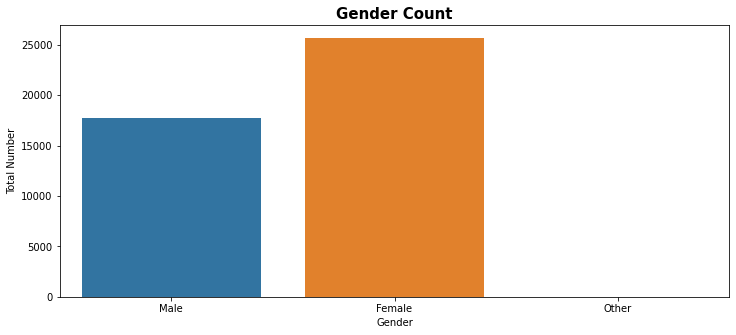

In [107]:
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',data=df,palette='tab10')
plt.ylabel('Total Number')
plt.title('Gender Count', fontsize= 15, weight='bold')


### The number of females are more than males.

Text(0.5, 1.0, 'Smoking Status')

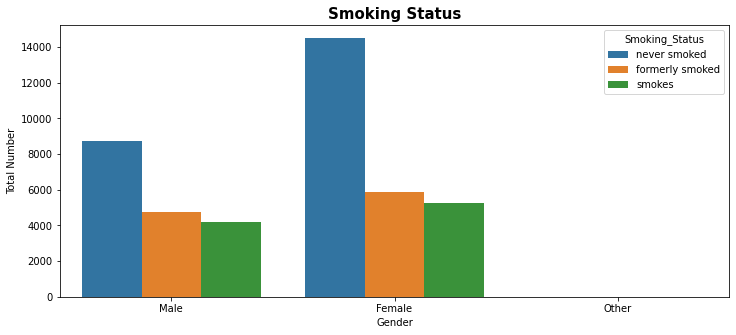

In [108]:
plt.figure(figsize=(12,5))
sns.countplot(x='Gender',data=df,palette='tab10',hue='Smoking_Status')
plt.ylabel('Total Number')
plt.title('Smoking Status', fontsize= 15, weight='bold')

### From this graph, we can say that:
1. There are more Female Non smokers who have never smoked than Males.
2. The number of Females who smokes are more than Males.


Text(0.5, 1.0, 'Residencey Distribution')

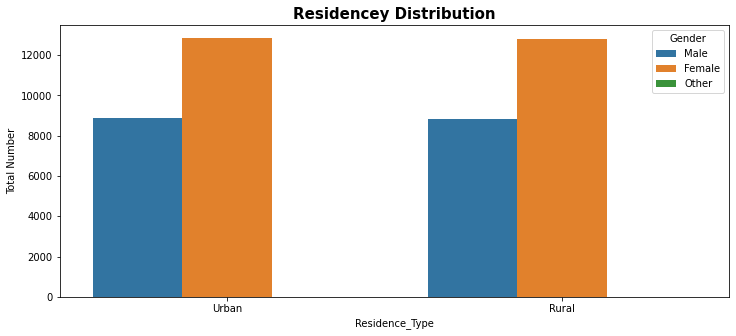

In [109]:
plt.figure(figsize=(12,5))
sns.countplot(x='Residence_Type',data=df,palette='tab10',hue='Gender')
plt.ylabel('Total Number')
plt.title('Residencey Distribution', fontsize= 15, weight='bold')

### There are more females who live in Urban and Rural Areas than Males

Text(0.5, 1.0, 'Strokes count with respect to Smoking Status')

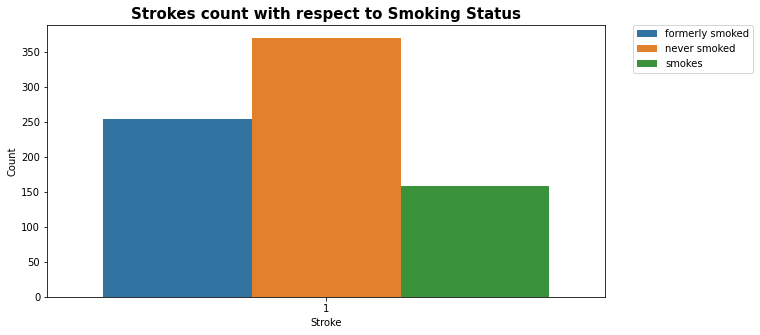

In [110]:
dfs=df[df['Stroke']==1] 
plt.figure(figsize=(10,5))
sns.countplot(x=dfs['Stroke'],data=dfs,hue= dfs['Smoking_Status'],palette='tab10')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Count')
plt.title('Strokes count with respect to Smoking Status', fontsize= 15, weight='bold')

## This is Interesting!!!
### The people who have smoked in the past or who have never smoked got more Strokes than the one who do.

Text(0.5, 1.0, 'Age versus Stroke occurence')

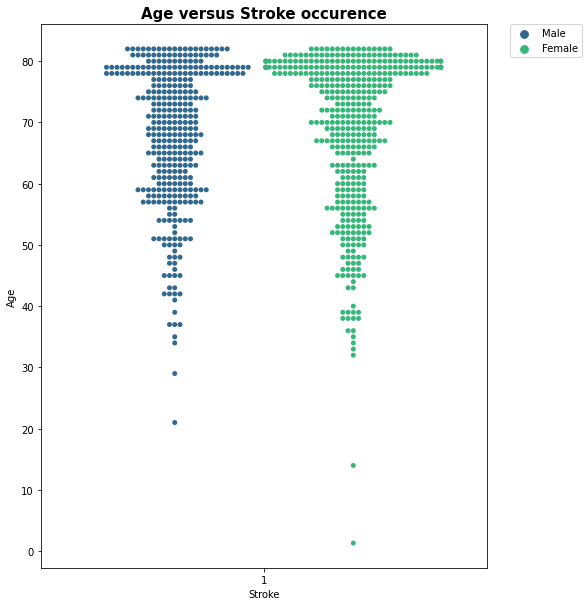

In [111]:
dfs=df[df['Stroke']==1] 
plt.figure(figsize=(8,10))
sns.swarmplot(y='Age',x='Stroke',data=dfs,palette='viridis',hue= 'Gender',dodge=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Age')
plt.title('Age versus Stroke occurence', fontsize= 15, weight='bold')

### Most of the Strokes occur beyond the age of 60 for both male and females.
### The chances of Strokes goes significantly higher around 80 years of age.

# BMI Vs Average Glucose Level for Smoking Status

<AxesSubplot:xlabel='Avg_Glucose_Level', ylabel='BMI'>

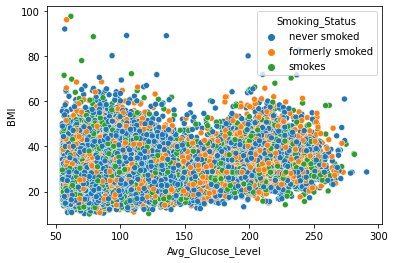

In [112]:
sns.scatterplot(x=df['Avg_Glucose_Level'],y=df['BMI'],hue=df['Smoking_Status'])

# BMI Vs Average Glucose Level for Gender Type

<AxesSubplot:xlabel='Avg_Glucose_Level', ylabel='BMI'>

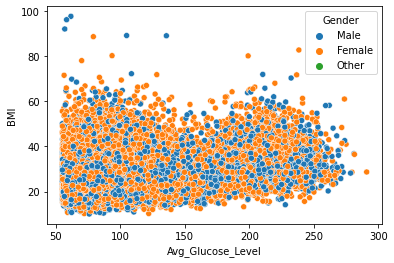

In [113]:
sns.scatterplot(x=df['Avg_Glucose_Level'],y=df['BMI'],hue=df['Gender'])

# BMI Vs Average Glucose Level for Work_Type

<AxesSubplot:xlabel='Avg_Glucose_Level', ylabel='BMI'>

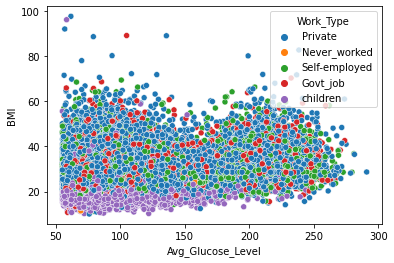

In [114]:
sns.scatterplot(x=df['Avg_Glucose_Level'],y=df['BMI'],hue=df['Work_Type'])

# Strokes by Work_Type

Text(0.5, 1.0, 'Strokes by Work_Type')

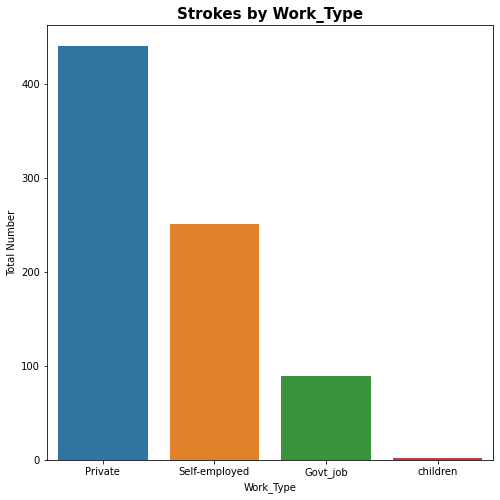

In [115]:
dfs=df[df['Stroke']==1] 
plt.figure(figsize=(8,8))
sns.countplot(x='Work_Type',data=dfs,palette='tab10')
plt.ylabel('Total Number')
plt.title('Strokes by Work_Type', fontsize= 15, weight='bold')

<AxesSubplot:>

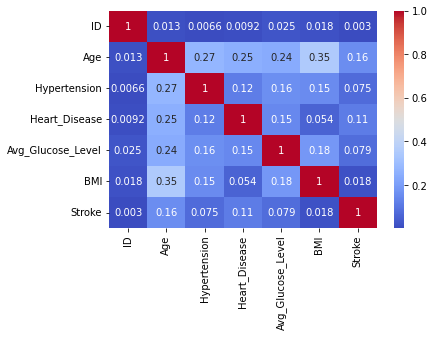

In [116]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Creating Model For Stroke Predictions

## Using get_dummies function to convert categorical variables into dummy or indicator variables

In [117]:
df.drop('ID',axis=1,inplace=True)
df.drop('Ever_Married',axis=1,inplace=True)
df.drop('Residence_Type',axis=1,inplace=True)

In [118]:
Dataf=pd.get_dummies(df,["Gender","Work_Type","Smoking_Status"])
Dataf.head()

,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,BMI,Stroke,Gender_Female,Gender_Male,Gender_Other,Work_Type_Govt_job,Work_Type_Never_worked,Work_Type_Private,Work_Type_Self-employed,Work_Type_children,Smoking_Status_formerly smoked,Smoking_Status_never smoked,Smoking_Status_smokes
1,58.0,1,0,87.96,39.2,0,0,1,0,0,0,1,0,0,0,1,0
2,8.0,0,0,110.89,17.6,0,1,0,0,0,0,1,0,0,0,1,0
3,70.0,0,0,69.04,35.9,0,1,0,0,0,0,1,0,0,1,0,0
4,14.0,0,0,161.28,19.1,0,0,1,0,0,1,0,0,0,1,0,0
5,47.0,0,0,210.95,50.1,0,1,0,0,0,0,1,0,0,1,0,0


In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

model=DecisionTreeClassifier()
X= Dataf[["Age","Hypertension","Heart_Disease","Avg_Glucose_Level","BMI","Gender_Male","Gender_Other","Work_Type_Govt_job",
      "Work_Type_Never_worked","Work_Type_Private","Work_Type_Self-employed",
       "Smoking_Status_formerly smoked","Smoking_Status_never smoked","Gender_Female","Work_Type_children","Smoking_Status_smokes"]]
y=Dataf["Stroke"]

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("accuracy score is ",accuracy_score(y_pred,y_test))



accuracy score is  0.9627304147465438


# So, we got 96% accuracy